1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.
   
3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [3]:
movies = pd.read_csv('tmdb_movies.csv')
genres = pd.read_csv('tmdb_genres.csv')

In [4]:
movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


In [5]:
genres

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction
5,18.0,Drama
6,53.0,Thriller
7,10751.0,Family
8,35.0,Comedy
9,36.0,History


1 . Top 10 filmów 

In [12]:
filtered_movies = movies[movies['vote_count'] > movies['vote_count'].quantile(.75)]
filtered_movies.sort_values(by='vote_average', ascending=False)[:10]

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
1847,1847,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


2. Średnia wykres

In [51]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies_dates = movies[(movies['release_date'] >= (dt.datetime(2009,12,31))) & (movies['release_date'] <= dt.datetime(2017,1,1))]
pd.options.display.float_format = '{:.0f}'.format
movies_gr = movies_dates.groupby(movies_dates.release_date.dt.year).agg({'revenue':'mean', 'budget':'mean'})
movies_gr.reset_index(inplace=True)

In [63]:
def milion(x, pos):
    return '{:2.1f}M'.format(x*1e-6)

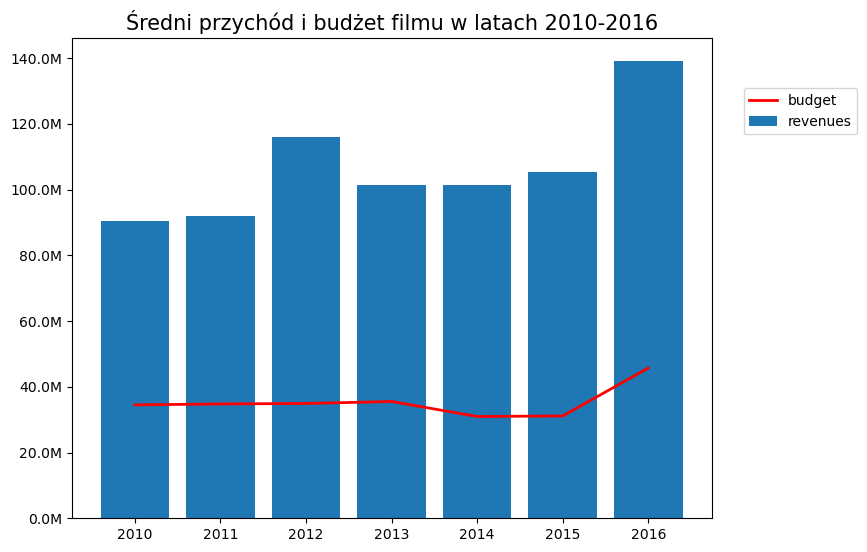

In [75]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(movies_gr['release_date'], movies_gr['revenue'], label='revenues')
axes.plot(movies_gr['release_date'], movies_gr['budget'], color='red', lw=2, label='budget')
axes.set_title('Średni przychód i budżet filmu w latach 2010-2016', size= 15)

formatter = plt.FuncFormatter(milion)
axes.yaxis.set_major_formatter(formatter)
axes.legend(loc=(1.05,0.8))

3. Łączenie movies i genres

In [77]:
genres.rename(columns={'Unnamed: 0': 'genre_id'}, inplace=True)

In [80]:
joined_movies = pd.merge(movies, genres, on='genre_id')
joined_movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,2009-12-10,2787965087,162,Released,Enter the World of Pandora.,Avatar,7,11800,28,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,2007-05-19,961000000,169,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500,12,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107,2015-10-26,880674609,148,Released,A Plan No One Escapes,Spectre,6,4466,28,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112,2012-07-16,1084939099,165,Released,The Legend Ends,The Dark Knight Rises,8,9106,28,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",44,2012-03-07,284139100,132,Released,"Lost in our world, found in another.",John Carter,6,2124,28,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14,1992-09-04,2040920,81,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,7,238,28,Action
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,1,2011-12-26,0,85,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,6,5,35,Comedy
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1,2013-10-13,0,120,Released,NaN,"Signed, Sealed, Delivered",7,6,35,Comedy
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,1,2012-05-03,0,98,Released,A New Yorker in Shanghai,Shanghai Calling,6,7,NaN,NaN


4. Top gatunek filmu

In [85]:
joined_movies['genres'].value_counts()

genres
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: count, dtype: int64

Najczęstszym gatunkiem wustępującym w bazie jest dramat, jest 1207 filmów z tego gatunku.

5. Średni czas trwania filmów

In [91]:
joined_movies.groupby(joined_movies['genres']).agg({'runtime':'mean'}).sort_values(by='runtime', ascending=False)

,runtime
genres,
History,134
War,126
Western,118
Drama,116
Adventure,113
Crime,112
TV Movie,110
Action,109
Science Fiction,109


Średnio najdłużej trwają filmy historyczne.

6. Histogram 

In [98]:
his_movies = joined_movies[joined_movies['genres'] == 'History']
his_movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
110,110,140000000,NaN,676,en,Pearl Harbor,The lifelong friendship between Rafe McCawley ...,34,2001-05-21,449220945,183,Released,It takes a moment to change history. It takes ...,Pearl Harbor,7,1791,36,History
280,280,80000000,http://www.publicenemies.net/,11322,en,Public Enemies,Depression-era bank robber John Dillinger's ch...,34,2009-07-01,214104620,140,Released,America's Most Wanted.,Public Enemies,6,1344,36,History
633,633,65000000,NaN,72976,en,Lincoln,A revealing drama that focuses on the 16th Pre...,36,2012-11-09,275293450,149,Released,With the moral courage and fierce determinatio...,Lincoln,7,1429,36,History
839,839,55000000,http://en.wikipedia.org/wiki/Evita_(film),8818,en,Evita,The hit musical based on the life of Evita Dua...,7,1996-12-14,141047179,134,Released,The Most Anticipated Motion Picture Event of T...,Evita,6,120,36,History
1091,1091,44000000,NaN,10858,en,Nixon,An all-star cast powers this epic look at Amer...,4,1995-12-22,13681765,192,Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,7,71,36,History
1349,1349,0,NaN,31908,en,Ghosts of Mississippi,Ghosts of Mississippi is a drama covering the ...,8,1996-12-20,0,130,Released,From the director of A FEW GOOD MEN comes a co...,Ghosts of Mississippi,6,40,36,History
1677,1677,30000000,NaN,1874,en,Goodbye Bafana,The true story of a white South African racist...,12,2007-02-11,0,140,Released,NaN,Goodbye Bafana,7,38,36,History
1877,1877,25485000,NaN,11165,en,Tora! Tora! Tora!,"In the summer of 1941, the United States and J...",10,1970-01-26,29548291,144,Released,The incredible attack on Pearl Harbor.,Tora! Tora! Tora!,7,147,36,History
1954,1954,25000000,NaN,33157,en,Waterloo,After defeating France and imprisoning Napoleo...,2,1970-10-26,3052000,128,Released,NaN,Waterloo,7,31,36,History
2008,2008,23000000,http://wip.warnerbros.com/inthevalleyofelah/,6973,en,In the Valley of Elah,A career officer and his wife work with a poli...,16,2007-08-31,29541790,124,Released,Sometimes finding the truth is easier than fac...,In the Valley of Elah,7,261,36,History


<Axes: >

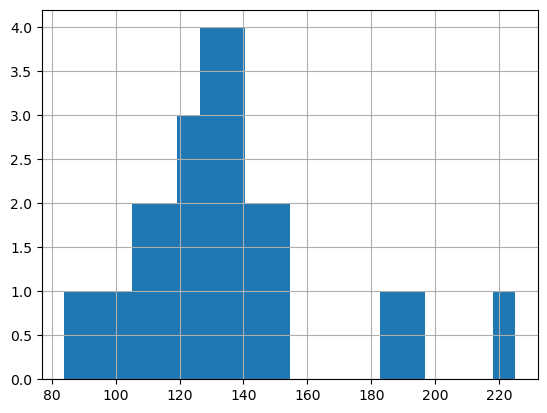

In [108]:
his_movies['runtime'].hist(bins=20)